# Prophet 처음 시작하기

In [1]:
import pandas as pd
from fbprophet import Prophet
import warnings
warnings.filterwarnings("ignore")
%config InlineBackend.figure_format = 'retina'
%matplotlib inline

# 파이썬 버전
- sklearn과 같은 방식 지원
- Prophet 객체를 만들고 fit과 predict 함수를 지원
- 입력은 ds(datestamp)와 y 컬럼명을 반드시 사용
- ds에서 날짜로는 YYYY-MM-DD 형식을 timestamp로는 YYYY-MM-DD HH:MM:SS 사용


## 데이터
- 위키피디어 로그 데이터

In [2]:
df = pd.read_csv('https://raw.githubusercontent.com/facebook/prophet/master/examples/example_wp_log_peyton_manning.csv')
print(df.shape)
df.head()

(2905, 2)


,ds,y
0,2007-12-10,9.590761
1,2007-12-11,8.519590
2,2007-12-12,8.183677
3,2007-12-13,8.072467
4,2007-12-14,7.893572


In [3]:
print(df.shape)

(2905, 2)


## 모델 구성 및 학습

In [4]:
m = Prophet()
m.fit(df)

INFO:numexpr.utils:NumExpr defaulting to 2 threads.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


In [5]:
df.ds.min(), df.ds.max()

('2007-12-10', '2016-01-20')

- 예측하고 싶은 미래 날짜를 자동으로 생성
- 기간을 인자로 입력

In [6]:
# 향 후 1년 예측
future = m.make_future_dataframe(periods=365)
print(future.shape)
future.tail()

(3270, 1)


,ds
3265,2017-01-15
3266,2017-01-16
3267,2017-01-17
3268,2017-01-18
3269,2017-01-19


- 예측은 predict 함수로 수행
- future에 있는 모든 날짜의 예측치를 추정하여 yhat 컬럼에 담는다
- 결과 forecast 객체에는 이외에도 여러가지 값들이 저장된다 (최대, 최소 범위 등)

In [7]:
forecast = m.predict(future)
print(forecast.shape)
forecast[['ds', 'yhat', 'yhat_lower', 'yhat_upper']].tail()

(3270, 19)


,ds,yhat,yhat_lower,yhat_upper
3265,2017-01-15,8.200924,7.529301,8.919331
3266,2017-01-16,8.525932,7.834422,9.249939
3267,2017-01-17,8.313330,7.612652,9.048847
3268,2017-01-18,8.145923,7.427399,8.906760
3269,2017-01-19,8.157831,7.439190,8.896389


In [8]:
forecast[:2]

,ds,trend,yhat_lower,yhat_upper,trend_lower,trend_upper,additive_terms,additive_terms_lower,additive_terms_upper,weekly,weekly_lower,weekly_upper,yearly,yearly_lower,yearly_upper,multiplicative_terms,multiplicative_terms_lower,multiplicative_terms_upper,yhat
0,2007-12-10,8.040603,8.256891,9.478995,8.040603,8.040603,0.803055,0.803055,0.803055,0.352293,0.352293,0.352293,0.450762,0.450762,0.450762,0.0,0.0,0.0,8.843657
1,2007-12-11,8.039061,7.973507,9.169330,8.039061,8.039061,0.553139,0.553139,0.553139,0.119645,0.119645,0.119645,0.433495,0.433495,0.433495,0.0,0.0,0.0,8.592200


### 결과 그래프
- Prophet.plot 함수 사용

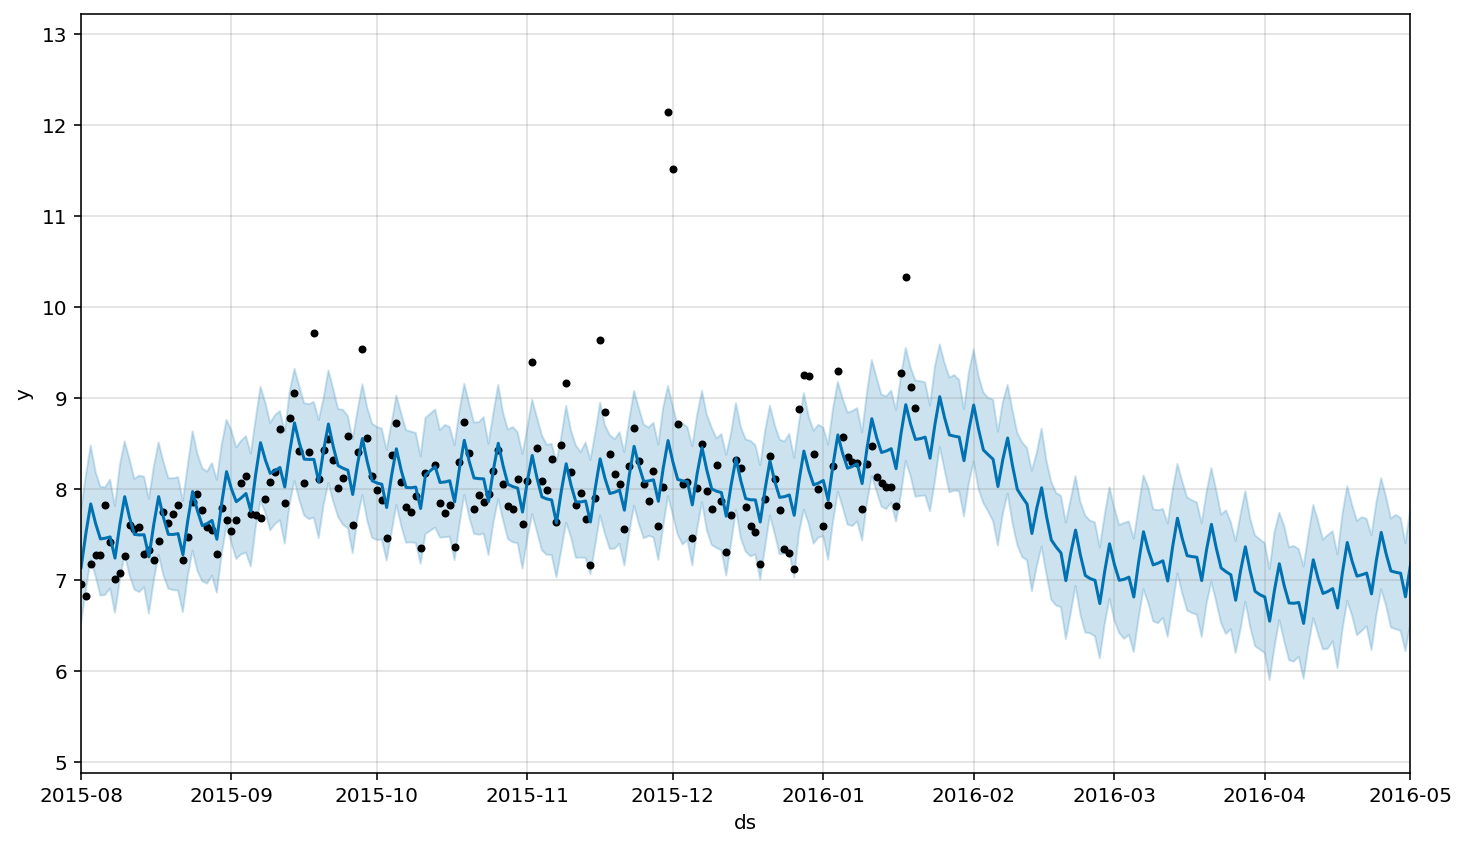

In [9]:
fig1 = m.plot(forecast)
from datetime import datetime
import matplotlib.pyplot as plt
plt.xlim([datetime(2015, 8, 1), datetime(2016, 5, 1)])
plt.show()

- 컴포넌트를 보려면 `Prophet.plot_components` 함수 사용
- 트렌드, 계절성, 휴일정보 등

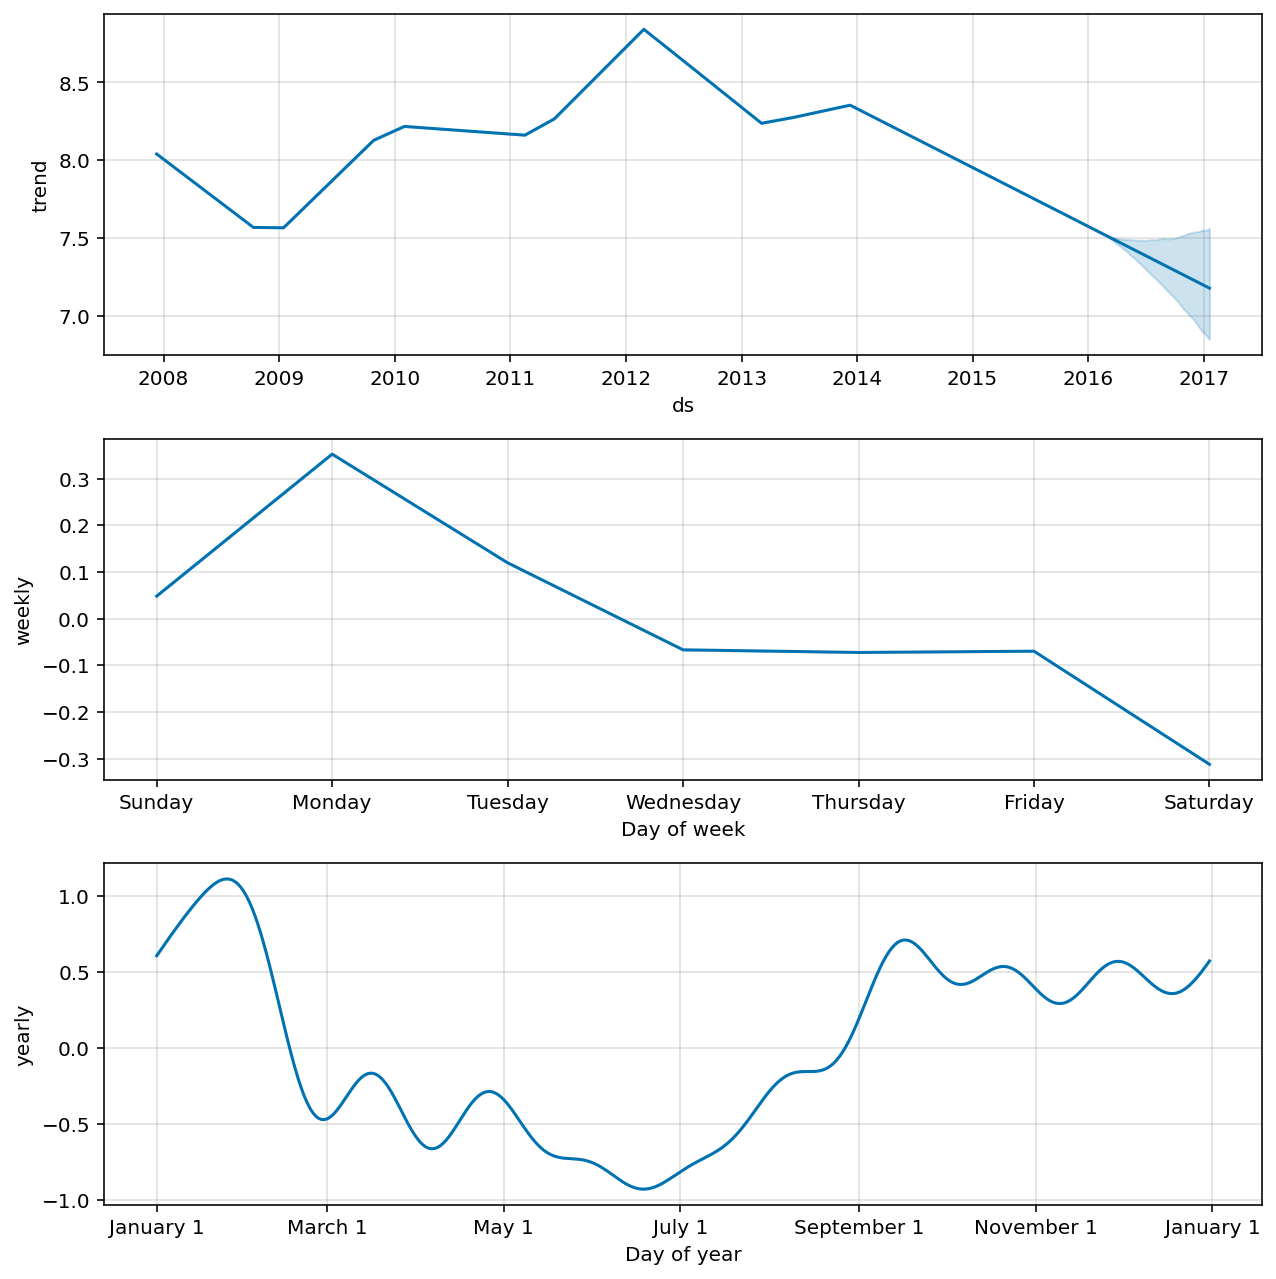

In [10]:
fig2 = m.plot_components(forecast)

# prophet을 사용한 시계열 예측
- https://machinelearningmastery.com/time-series-forecasting-with-prophet-in-python/
- 페이스북 https://research.fb.com/blog/2017/02/prophet-forecasting-at-scale/
- 단변수 예측
- 데이터프레임 구조로 입력
- in-sample and out-of-sample forecasts
- trends, seasonality, and holidays 지원

In [11]:
import fbprophet
print('Prophet %s' % fbprophet.__version__)

Prophet 0.7.1


In [12]:
# import pandas as pd
# import numpy as np
# import matplotlib.pyplot as plt
# from fbprophet import Prophet
# from sklearn.metrics import mean_absolute_error, mean_squared_error
# from sklearn.metrics import r2_score

# %config InlineBackend.figure_format = 'retina'

## 데이터 읽기

In [13]:
path = 'https://raw.githubusercontent.com/StillWork/data/master/car_sales.csv'
df = pd.read_csv(path)
print(df.shape)

(108, 2)


In [14]:
df[:3]

,Month,Sales
0,1960-01,6550
1,1960-02,8728
2,1960-03,12026


In [15]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 108 entries, 0 to 107
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   Month   108 non-null    object
 1   Sales   108 non-null    int64 
dtypes: int64(1), object(1)
memory usage: 1.8+ KB


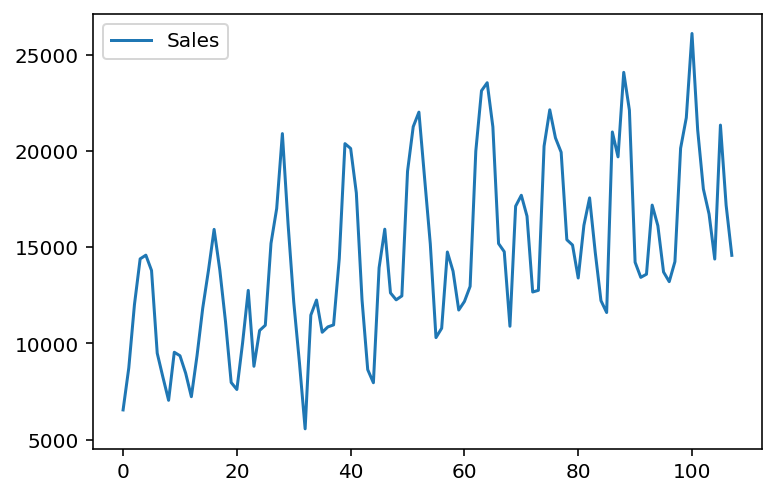

In [16]:
df.plot()
plt.show()

In [17]:
df.columns = ['ds', 'y']
df['ds']= pd.to_datetime(df['ds'])
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 108 entries, 0 to 107
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype         
---  ------  --------------  -----         
 0   ds      108 non-null    datetime64[ns]
 1   y       108 non-null    int64         
dtypes: datetime64[ns](1), int64(1)
memory usage: 1.8 KB


In [18]:
df[:3]

,ds,y
0,1960-01-01,6550
1,1960-02-01,8728
2,1960-03-01,12026


## 학습

In [19]:
model = Prophet()
model.fit(df)

INFO:fbprophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


In [20]:
df['ds'].min(), df['ds'].max(), 

(Timestamp('1960-01-01 00:00:00'), Timestamp('1968-12-01 00:00:00'))

## 향후 1년간 예측

In [21]:
future = model.make_future_dataframe(periods=12, freq='MS')
future

,ds
0,1960-01-01
1,1960-02-01
2,1960-03-01
3,1960-04-01
4,1960-05-01
...,...
115,1969-08-01
116,1969-09-01
117,1969-10-01
118,1969-11-01


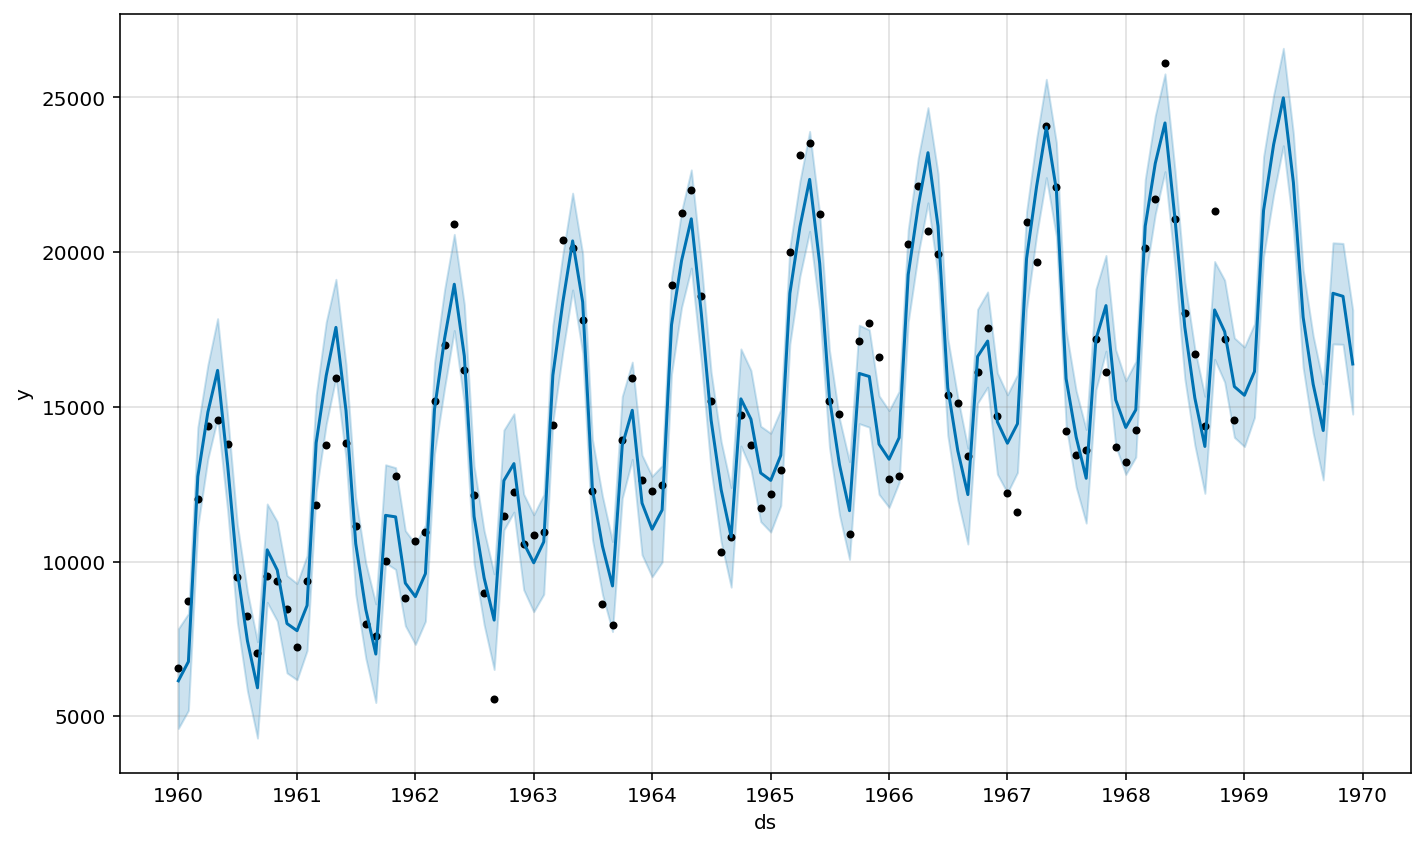

In [22]:
forecast = model.predict(future)
model.plot(forecast)
plt.show()

In [23]:
def plot_y_pred(y_test, y_pred):
    plt.figure(figsize=(8, 5))
    plt.plot(y_test, c='r')
    plt.plot(y_pred, c='b')
    plt.show()
    print("R2=", r2_score(y_test, y_pred).round(3))
    error = abs(y_test - y_pred)
    print("MAE=", error.mean().round(3))
    print("rmse=", np.sqrt((error**2).mean()).round(3))
    print("max=", max(error).round(3))

## 훈련과 검증
- 최종 1년 데이터를 test 데이터로 사용

In [24]:
train = df[:-12]
test = df[-12:]

In [25]:
future = test.drop("y", axis=1) 
future

,ds
96,1968-01-01
97,1968-02-01
98,1968-03-01
99,1968-04-01
100,1968-05-01
101,1968-06-01
102,1968-07-01
103,1968-08-01
104,1968-09-01
105,1968-10-01


In [26]:
model = Prophet()
model.fit(train)

forecast = model.predict(future)
y_pred = forecast['yhat'].values
y_test = test['y'].values

INFO:fbprophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


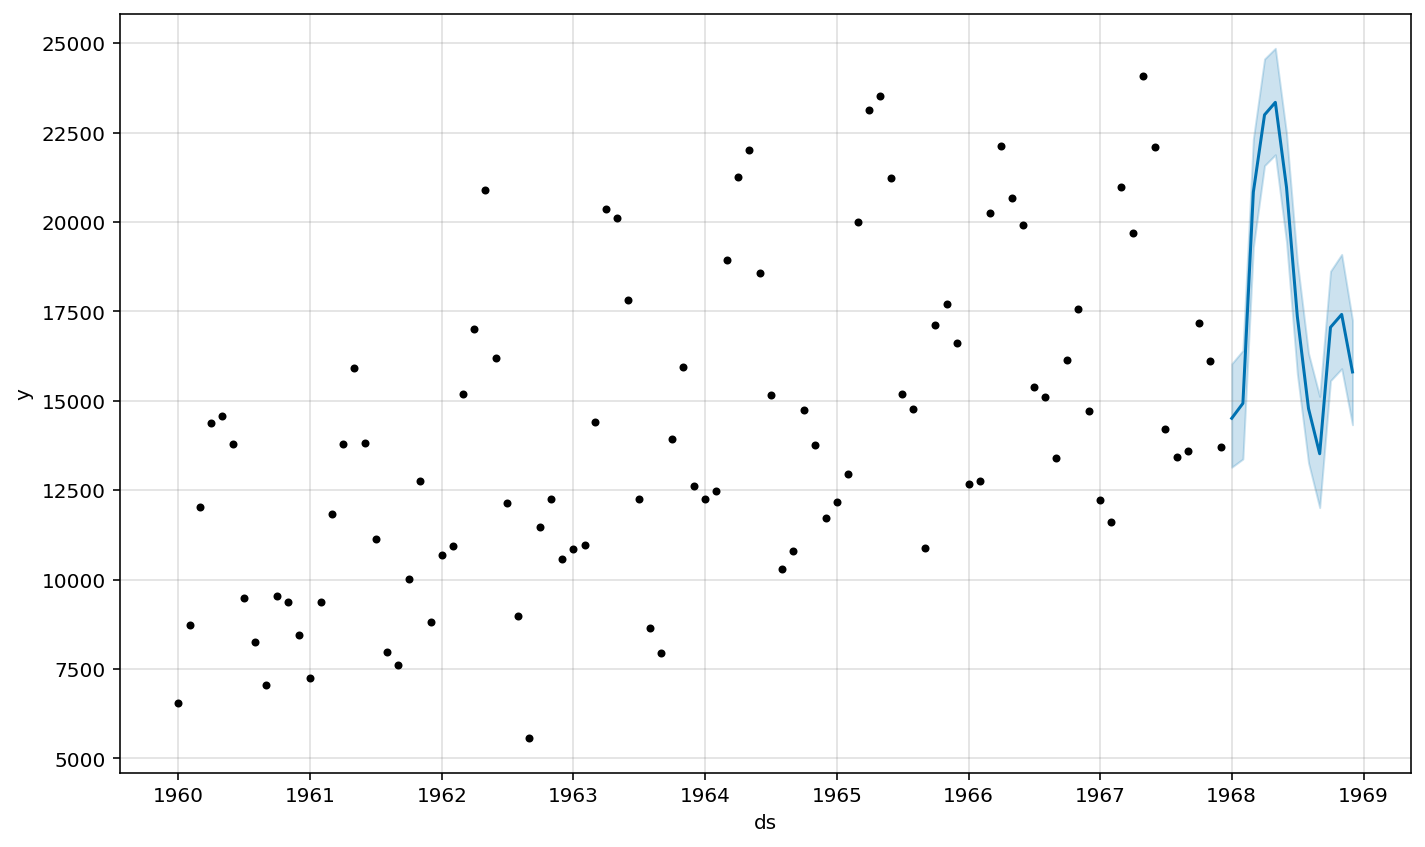

In [27]:
model.plot(forecast); plt.show()

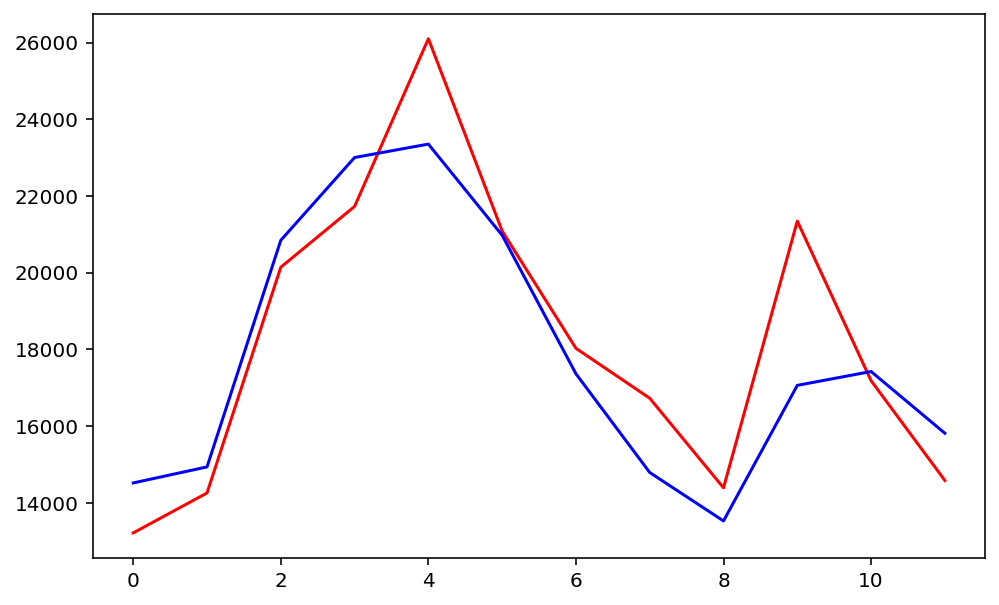

NameError: ignored

In [28]:
plot_y_pred(y_test, y_pred)

In [ ]:
fig2 = model.plot_components(forecast)

# 선형 또는 naive 모델

In [ ]:
def naive_model(x_seq):
    return np.array(x_seq).mean(axis=1)

In [ ]:
def split_seq(sequence, n_steps):
    x, y = [], []
    for i in range(len(sequence)):
        if i > len(sequence) - n_steps - 1 : break
        x.append(sequence[i:i+n_steps])
        y.append(sequence[i+n_steps])
    return np.array(x), np.array(y)

In [ ]:
def split_seq_2(sequence, n_steps_in, n_steps_out=1):
  x, y = [],[]
  for i in range(len(sequence)):
    end_ix = i + n_steps_in
    out_end_ix = end_ix + n_steps_out
    if out_end_ix > len(sequence):
        break
    seq_x, seq_y = sequence[i:end_ix], sequence[out_end_ix-1]
    x.append(seq_x)
    y.append(seq_y)
  return np.array(x), np.array(y)

In [ ]:
from sklearn.linear_model import LinearRegression
y = df.y.values
cut = np.int((len(y)*0.89))
train = y[:cut]
test = y[cut:]
y.shape, train.shape, test.shape, cut

In [ ]:
lr= LinearRegression()
for n_steps in range(1,10):
  x_train, y_train = split_seq(train, n_steps)
  x_test, y_test = split_seq(test, n_steps)
  lr.fit(x_train, y_train) 
  print(n_steps, lr.score(x_test, y_test).round(3))

In [29]:
n_steps_in = 1
n_steps_out = 1
x_train, y_train = split_seq_2(train, n_steps_in, n_steps_out)
x_test, y_test = split_seq_2(test, n_steps_in, n_steps_out)
# lr.fit(x_train, y_train) 
y_pred = naive_model(x_test)
plot_y_pred(y_test, y_pred)

NameError: ignored